## Tarea 2 Procesamiento de Imagenes 

Curso: MDS 112 Sección 1

Alumno: Esteban Hernández

> Ejecutar el código proceduralmente, la imagen se asume se encuentra en el mismo directorio donde se encuentra el código

>Se ha utilizado Python 3.11.3 para la ejecución, con a las las librerías: 
>- cv2 
>- numpy 
>- matplotlib
>- scipy

In [1]:
import sys, cv2, numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

cmap="gray"

def show_delta(img_antes, img_despues, dpi=120, t_antes="Antes", t_despues="Despues", vertical=False):
    if not vertical: 
        fig, ax = plt.subplots(nrows=1, ncols=2, dpi=dpi)
        x=10; y=15
    else: 
        fig, ax = plt.subplots(nrows=2, ncols=1, dpi=dpi)
        x=10; y=8

    fig.set_size_inches(x,y)
    
    ax[0].imshow(img_antes,cmap)
    ax[0].set_title(t_antes)

    ax[1].imshow(img_despues,cmap)
    ax[1].set_title(t_despues)
    plt.show()
    
print("User Current Version:-", sys.version)

User Current Version:- 3.11.3 (main, Apr 18 2023, 13:09:54) [GCC 12.2.1 20230201]


#### Sección 1

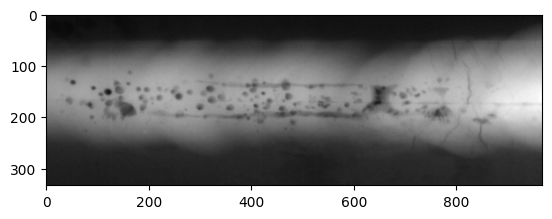

(333, 968)

In [2]:
img = cv2.cvtColor( cv2.imread('fallas.tif'), cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap)
plt.show()
img.shape

#### Sección 2

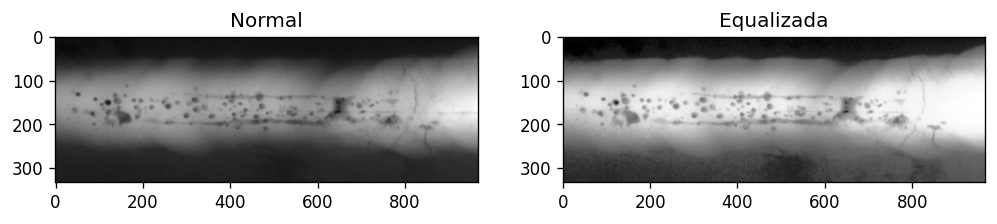

In [3]:
#Imagen Equalizada
eq_img = cv2.equalizeHist(img)
show_delta(img, eq_img, t_antes="Normal", t_despues="Equalizada", dpi=120)

#### Sección 3

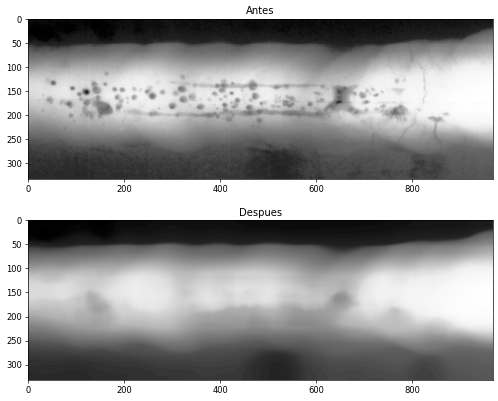

In [4]:
#Filtro de mediana
mediana = lambda img: np.median(img.flatten())

#Aplicar filtro de mediana para imagen equalizada buscando hacer desaparecer la falla
rango = 45
med_img = ndi.generic_filter(eq_img, mediana, [rango,rango])


show_delta(eq_img, med_img, vertical=True, dpi=60)

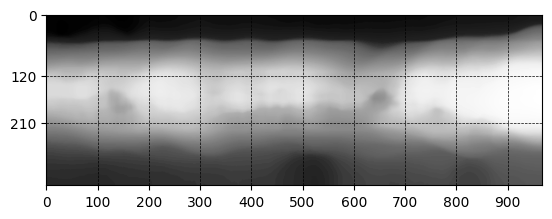

In [5]:
plt.grid(True, color="black", linestyle='--',linewidth=0.5)
plt.rcParams['figure.dpi'] = 300

plt.xticks(np.arange(0,1000,100))
plt.yticks([0,210,120,333])
plt.imshow(med_img,cmap)

plt.savefig('med_img.png',bbox_inches = 'tight')
plt.show()

#### Sección 4

In [6]:
#Resultado Requerimiento 4:
#Dividir para explicar imagen filtrada

plt.grid(True, color="white", linestyle='--',linewidth=0.5)
plt.rcParams['figure.dpi'] = 300

plt.xticks(np.arange(0,1000,100))
plt.yticks([0,210,120,333])

falla_img = cv2.subtract(med_img,eq_img)
plt.imshow(falla_img,cmap)

plt.savefig('falla_img.png',bbox_inches = 'tight')
plt.show()

#### Requerimiento 5

In [7]:
#Resultado Requerimiento 5:
#Dividir para explicar imagen filtrada

plt.grid(True, color="white", linestyle='--',linewidth=0.5)
plt.rcParams['figure.dpi'] = 300

plt.xticks(np.arange(0,1000,100))
plt.yticks([0,210,120,333])

bin_img = cv2.threshold(falla_img, 10, 255, cv2.THRESH_BINARY)[1]
plt.imshow(bin_img,cmap)

plt.savefig('bin_img.png',bbox_inches = 'tight')
plt.show()
print()

#### Requerimiento 6

In [8]:
#Pasar imagen binaria de valores 0 y 255 a valores de 0 y 1 para multiplicación.
bin_img = np.uint8(np.where(bin_img > 0, 1, 0))

final_img = cv2.multiply(eq_img,bin_img)

plt.grid(True, color="white", linestyle='--',linewidth=0.5)
plt.rcParams['figure.dpi'] = 300

plt.xticks(np.arange(0,1000,100))
plt.yticks([0,210,120,333])

plt.imshow(final_img,cmap)

plt.savefig('final_img.png',bbox_inches = 'tight')
plt.show()
